## Classification of Customer Deposit Status 

Here we model the classification model from bank marketing data (https://www.kaggle.com/janiobachmann/bank-marketing-dataset). This data is consist of columns that relevan to their deposit status, there are age, job, marital, education, balance, housing, loan, contact, day.

We will predict customer deposit status.

In [59]:
import pandas as pd 

df = pd.read_csv('data/bank.csv')
df.drop(['default'],axis=1,inplace=True)
df_original = df.copy()
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Exploratory Data Analysis

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   balance    11162 non-null  int64 
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   contact    11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


In [61]:
# Prints Descriptive Statistics
# df.describe()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


### Data Preprocessing

In [62]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
# Encode Categorical Data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
# One Hot Encoder for feature
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode the data
df_encode = pd.DataFrame(encoder.fit_transform(df[['job','marital','education','default','housing','loan','contact','month','poutcome']]))
df_encode.columns = encoder.get_feature_names(['job','marital','education','default','housing','loan','contact','month','poutcome'])

# Replace Categorical data
df.drop(['job','marital','education','default','housing','loan','contact','month','poutcome'],axis=1,inplace=True)
df_encode = pd.concat([df_encode,df],axis=1)

df_encode.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,59,2343,5,1042,1,-1,0,yes
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,56,45,5,1467,1,-1,0,yes
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,41,1270,5,1389,1,-1,0,yes
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,55,2476,5,579,1,-1,0,yes
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,54,184,5,673,2,-1,0,yes


In [7]:
# Alternative One Hot Encoder
# dfo_encode = pd.get_dummies(df_original)[df_encode.columns]
# dfo_encode.head()

In [8]:
# Label Encoding for Target
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_encode['deposit'] = labelencoder.fit_transform(df_encode['deposit'])
df_encode.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,59,2343,5,1042,1,-1,0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,56,45,5,1467,1,-1,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,41,1270,5,1389,1,-1,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,55,2476,5,579,1,-1,0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,54,184,5,673,2,-1,0,1


In [9]:
print(df_original['deposit'].value_counts())
print(df_encode['deposit'].value_counts())

no     5873
yes    5289
Name: deposit, dtype: int64
0    5873
1    5289
Name: deposit, dtype: int64


#### Set Feature and Target

In [10]:
col = df_encode.columns.to_list()
col.remove('deposit')

# set feature
x = df_encode[col]

# set target
y = df_encode['deposit']

### Set Training and Testing Data

In [11]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test  = train_test_split(x , y, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(f"""{x_train.shape}  \n{x_test.shape}  \n{y_train.shape}  \n{y_test.shape} """)

(7813, 51)  
(3349, 51)  
(7813,)  
(3349,) 


In [12]:
x_test

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
8422,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,31,554,5,94,1,-1,0
9226,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,43,514,20,34,2,-1,0
8162,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,26,277,14,514,2,-1,0
4337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,39,91,3,213,1,185,1
2438,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,40,0,6,131,2,98,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5642,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,36,561,9,198,2,-1,0
2698,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,50,810,15,91,1,103,3
9515,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,35,451,17,220,6,-1,0
2651,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,47,3033,8,293,1,-1,0


### Decision tree

In [41]:
# Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(x_train, y_train)

# Predict to Test Data 
y_pred_dtc = dtc.predict(x_test)

In [42]:
# pip install six
# pip install pydotplus
# pip install graphviz

In [43]:
# Visualize Tree
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['notchurn', 'churn'],
                feature_names=x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

#### Model Evaluation

In [44]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[1360,  400],
       [ 316, 1273]], dtype=int64)

In [45]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
prec_dtc = metrics.precision_score(y_test, y_pred_dtc)
rec_dtc = metrics.recall_score(y_test, y_pred_dtc)
f1_dtc = metrics.f1_score(y_test, y_pred_dtc)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_dtc)

print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.7862048372648551
Precision: 0.7609085475194262
Recall: 0.8011327879169289
F1 Score: 0.7805027590435316
Cohens Kappa Score: 0.5723901160630026


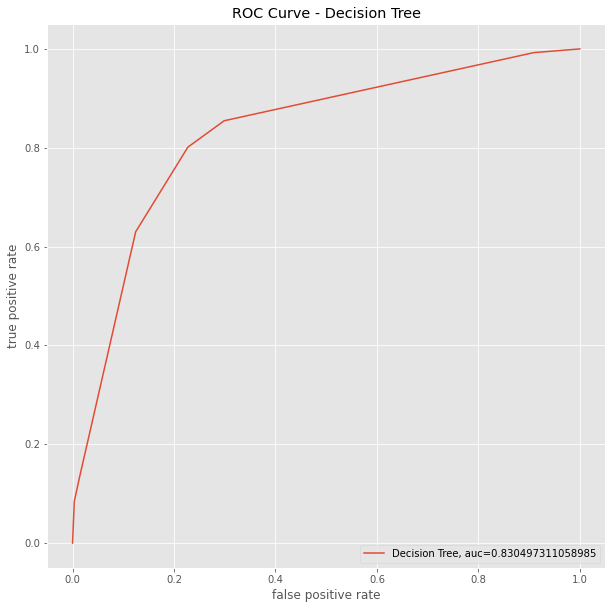

In [46]:
# Show ROC Curve
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_proba = dtc.predict_proba(x_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# Naive Bayes

In [47]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Predict to Test Data
y_pred_gnb = gnb.predict(x_test)

In [48]:
# Model Evaluation
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[1478,  282],
       [ 576, 1013]], dtype=int64)

In [49]:
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7438041206330248
Precision: 0.7822393822393823
Recall: 0.6375078665827565
F1 Score: 0.70249653259362
Cohens Kappa Score: 0.48160943718985694


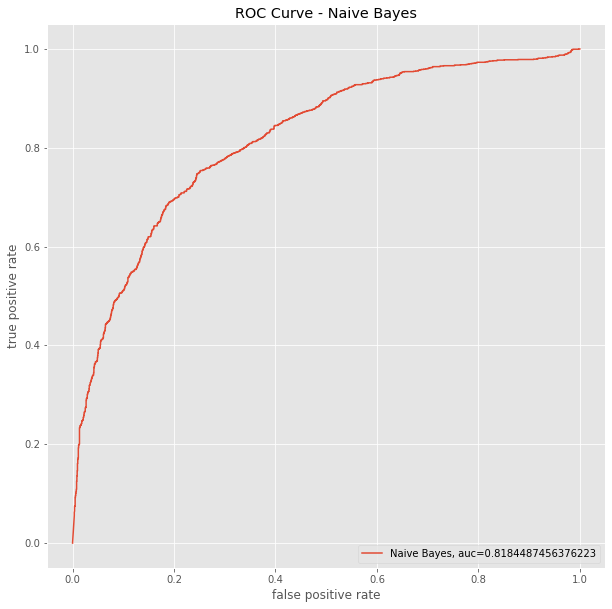

In [50]:
# ROC Curve
y_pred_proba = gnb.predict_proba(x_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### Model Comparison

In [51]:
# Comparing Model Performance
print("Decision Tree Accuracy =",acc_dtc)
print("Decision Tree Precision =",prec_dtc)
print("Decision Tree Recall =",rec_dtc)
print("Decision Tree F1-Score =", f1_dtc)
print("_______________________")
print("Naive Bayes Accuracy =", acc_gnb)
print("Naive Bayes Precision =", prec_gnb)
print("Naive Bayes Recall =", rec_gnb)
print("Naive Bayes F1-Score =", f1_gnb)

Decision Tree Accuracy = 0.7862048372648551
Decision Tree Precision = 0.7609085475194262
Decision Tree Recall = 0.8011327879169289
Decision Tree F1-Score = 0.7805027590435316
_______________________
Naive Bayes Accuracy = 0.7438041206330248
Naive Bayes Precision = 0.7822393822393823
Naive Bayes Recall = 0.6375078665827565
Naive Bayes F1-Score = 0.70249653259362


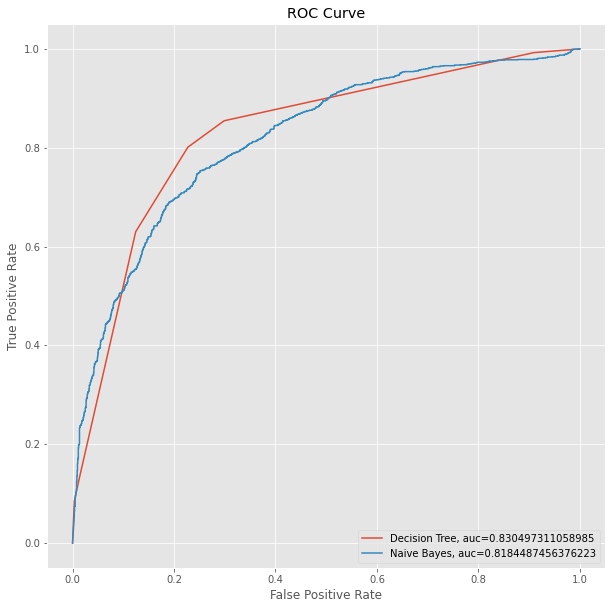

In [52]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [56]:
# Create Datafame Contains Fature and Result of prediction
df_compare = x_test.copy()
df_compare['ActualClass'] = y_test
df_compare['DecisonTree'] = y_pred_dtc
df_compare['NaiveBayes'] = y_pred_gnb

In [63]:
df_compare.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,balance,day,duration,campaign,pdays,previous,ActualClass,DecisonTree,NaiveBayes
8422,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31,554,5,94,1,-1,0,0,0,0
9226,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43,514,20,34,2,-1,0,0,0,0
8162,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,277,14,514,2,-1,0,0,1,0
4337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,39,91,3,213,1,185,1,1,1,1
2438,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,40,0,6,131,2,98,6,1,1,1


In [ ]:
# End